# Custom batch model

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
bs = pd.read_csv("basic_sample.csv") #z=x*2+y*3+2
bs.sample(5)

,x,y,z
13,5,7,33
2,2,2,12
14,6,2,20
12,4,6,28
8,1,2,10


In [3]:
inputs = bs.drop('z', axis='columns')
print(inputs)
print(inputs.shape)

    x   y
0   1   1
1   2   2
2   2   2
3   3   3
4   4   4
5   5   5
6   6  21
7   7   1
8   1   2
9   1   3
10  2   4
11  3   5
12  4   6
13  5   7
14  6   2
15  7   1
16  1   2
17  2   3
18  3   4
(19, 2)


In [4]:
inputs = inputs.values.reshape(bs.shape[0],2)

In [5]:
inputs

array([[ 1,  1],
       [ 2,  2],
       [ 2,  2],
       [ 3,  3],
       [ 4,  4],
       [ 5,  5],
       [ 6, 21],
       [ 7,  1],
       [ 1,  2],
       [ 1,  3],
       [ 2,  4],
       [ 3,  5],
       [ 4,  6],
       [ 5,  7],
       [ 6,  2],
       [ 7,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4]], dtype=int64)

In [6]:
z = bs['z'].values.reshape(bs.shape[0],1)
z

array([[ 7],
       [12],
       [12],
       [17],
       [22],
       [27],
       [77],
       [19],
       [10],
       [13],
       [18],
       [23],
       [28],
       [33],
       [20],
       [19],
       [10],
       [15],
       [20]], dtype=int64)

In [7]:
z.shape

(19, 1)

In [8]:
import time

class custom_train:
    
    
    def __init__(self, model, optimizer_fn, loss_fn, metric_fn):
        self.model = model
        self.optimizer = optimizer_fn
        self.loss_fn = loss_fn
        self.metrics = metric_fn

    #tf.function
    def train_step(self, x, y):
        with tf.GradientTape() as tape:
            #print(f'x:{x}, y:{y} {type(x)}')
            logits = self.model(x, training=True)
            loss_value = self.loss_fn(y, logits)
        grads = tape.gradient(loss_value, self.model.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_weights))
        self.metrics.update_state(y, logits)
        return loss_value

    def train(self, inputs, outputs, epochs, epoch_log, loss_threshold):
        loss_list = []
        epoch_list = []
        start_time = time.time()
        for epoch in range(epochs):
            loss_value = self.train_step(inputs, outputs)
            
            # Display metrics at the end of each epoch.
            train_acc = self.metrics.result()
            
            if epoch%epoch_log==0:
                loss_list.append(loss_value)
                epoch_list.append(epoch)
                print(
                    "Training acc over epoch: %.4f Training loss (for one batch) at step %d: %.4f Time taken: %.2fs " 
                    % (float(train_acc), epoch, float(loss_value), (time.time() - start_time))
                )
            if loss_value <= loss_threshold:
                break
            # Reset training metrics at the end of each epoch
            self.metrics.reset_states()
            
        return loss_list, epoch_list

In [9]:
input_layer = keras.Input(shape=(2,))
hidden_layer = keras.layers.Dense(2)(input_layer)
output_layer = keras.layers.Dense(1)(hidden_layer)

model = keras.Model(input_layer, output_layer)
optimizer = tf.keras.optimizers.Adam()
loss_function = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
metric = tf.keras.metrics.MeanAbsoluteError()
my_train = custom_train(model, optimizer, loss_function, metric)
loss_list, epoch_list = my_train.train(inputs, z, 5000, 50, 0.01)


Training acc over epoch: 20.7631 Training loss (for one batch) at step 0: 682.2684 Time taken: 0.89s 
Training acc over epoch: 19.4842 Training loss (for one batch) at step 50: 609.6435 Time taken: 1.48s 
Training acc over epoch: 18.2279 Training loss (for one batch) at step 100: 542.5945 Time taken: 2.05s 
Training acc over epoch: 16.9868 Training loss (for one batch) at step 150: 480.4633 Time taken: 2.56s 
Training acc over epoch: 15.7503 Training loss (for one batch) at step 200: 422.5603 Time taken: 3.08s 
Training acc over epoch: 14.5090 Training loss (for one batch) at step 250: 368.3820 Time taken: 3.61s 
Training acc over epoch: 13.2548 Training loss (for one batch) at step 300: 317.6168 Time taken: 4.13s 
Training acc over epoch: 11.9826 Training loss (for one batch) at step 350: 270.1801 Time taken: 4.63s 
Training acc over epoch: 10.6926 Training loss (for one batch) at step 400: 226.2448 Time taken: 5.13s 
Training acc over epoch: 9.3923 Training loss (for one batch) at st

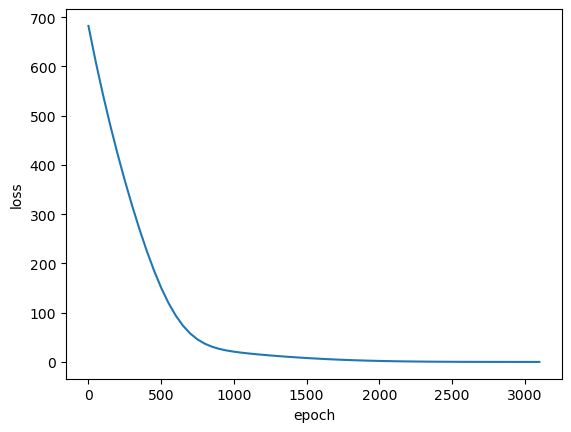

In [10]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(epoch_list, loss_list)


In [11]:
temp = np.array([[3, 2]], dtype='int64')

In [12]:
model.predict(temp)

1/1 [==============================] - 0s 75ms/step


array([[14.019831]], dtype=float32)